In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()
np.random.seed(42)

# Loading data

In [63]:
tweets = pd.read_csv('social_listening1/original_tweets.csv', lineterminator='\n')
print(tweets.shape)
tweets.head()

(1011563, 15)


,_id,created_at,favorite_count,full_text,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name
0,5bd86c7968a761d62501fda2,Sun Sep 23 15:01:52 +0000 2018,1,2016\nRemember when #PeterDutton was found gui...,0,asylumseeker,Wed Oct 02 00:18:21 +0000 2013,This page is sharing information about the Lib...,6490,5435,en,261,Western Australia,TALAOLP,Talaolp
1,5bd86c7968a761d62501fda5,Sun Sep 23 11:09:04 +0000 2018,1,"This pains me, but it's time to compromise on ...",1,asylumseeker,Sat Nov 28 02:34:51 +0000 2009,"big fan of irreverent political commentary, c...",1966,3281,en,125,"country Victoria, Australia",eithne,eithne52
2,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,7,What about all his other well paid jobs! He ha...,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968
3,5bd86c7968a761d62501fdab,Sun Sep 23 00:47:55 +0000 2018,2,A must read analysis of policy paralysis on as...,2,asylumseeker,Sat Aug 03 03:08:39 +0000 2013,"Senior Counsel, AWL Woman Lawyer of the Year, ...",5019,932,en,85,Australia,Fi McLeod SC,FiMcLeodSC
4,5bd86c7968a761d62501fdaf,Sat Sep 22 02:49:45 +0000 2018,0,"""@halyapuff: #Ukrainian prosecutor general adm...",0,asylumseeker,Fri Feb 04 22:40:35 +0000 2011,NaN,2097,1853,en,83,THE MOON,Gaby Skittles friend,GABchaag10


In [64]:
# check for all missing values
tweets.isnull().sum()

_id                          0
created_at                   0
favorite_count               0
full_text                    0
retweet_count                0
u4u_dataset                  0
user.created_at              0
user.description        151934
user.followers_count         0
user.friends_count           0
user.lang                    0
user.listed_count            0
user.location           279866
user.name                   81
user.screen_name             0
dtype: int64

In [65]:
tweets['created_at'] = pd.to_datetime(tweets['created_at'], format='%a %b %d %H:%M:%S +0000 %Y')

In [66]:
locations = pd.read_csv('social_listening1/location_tweets.csv', lineterminator='\n')
print(locations.shape)
locations.head()

(35052, 25)


,_id,created_at,entities.media.type,favorite_count,full_text,place.bounding_box.type,place.country,place.country_code,place.full_name,place.id,...,user.created_at,user.description,user.followers_count,user.friends_count,user.lang,user.listed_count,user.location,user.name,user.screen_name,coordinates
0,5bd86c7968a761d62501fda9,Sun Sep 23 02:01:55 +0000 2018,NaN,7,What about all his other well paid jobs! He ha...,Polygon,Australia,AU,"Grafton, New South Wales",00de891a25d97b58,...,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,en,358,NaN,Paul Dutton,pauldutton1968,"[[152.889490016, -29.7611804625], [152.9670013..."
1,5bd86c7968a761d62501fe2e,Sun Sep 23 22:00:37 +0000 2018,NaN,1,@SarfarazZoe @unhcr No it doesn't and I fully ...,Polygon,Australia,AU,"Gold Coast, Queensland",017453ae077eafd3,...,Tue Sep 24 04:00:01 +0000 2013,To see a world in a grain of sand and a heaven...,3704,1779,en,321,NaN,Anne Carlin - Digital Idiot,sacarlin48,"[[153.186551712, -28.2003171475], [153.5521712..."
2,5bd86c7968a761d62501fe40,Sun Sep 23 16:21:57 +0000 2018,NaN,0,Generally migration and specially forced migra...,Polygon,Turkey,TR,"Yenimahalle, Türkiye",6e9cef2a932796f9,...,Fri Nov 20 18:01:30 +0000 2009,"Dr.(Ph.D.),Gazi/AHBV Üniversitesi Uluslararası...",159,6,tr,2,"Gerze/Sinop, Ankara",Murat Saraçlı,murat_srcl,"[[32.6433269, 39.9104357], [32.8461069, 39.910..."
3,5bd86c7968a761d62501fe4c,Sun Sep 23 02:01:55 +0000 2018,NaN,7,What about all his other well paid jobs! He ha...,Polygon,Australia,AU,"Grafton, New South Wales",00de891a25d97b58,...,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8642,5531,en,358,NaN,Paul Dutton,pauldutton1968,"[[152.889490016, -29.7611804625], [152.9670013..."
4,5bd86c7968a761d62501fe9d,Sat Oct 13 22:15:17 +0000 2018,NaN,4,@InsidersABC @DavidMarrTweets @swrightwestoz S...,Polygon,Australia,AU,"Sydney, New South Wales",0073b76548e5984f,...,Sat Jun 21 06:51:37 +0000 2014,Cynic from the inner-west. Sometimes writes ab...,1304,1330,en,52,"Sydney, Australia",Joanna Mendelssohn,oldlillipilli,"[[150.520928608, -34.1183470085], [151.3430209..."


In [67]:
df = (
    pd.merge(
        tweets.set_index('_id'), 
        locations.set_index('_id')[locations.columns.difference(tweets.columns)], 
        left_index=True, right_index=True
    )
    .reset_index(drop=False)
)

print(df.shape)
df.head()

(35052, 25)


,_id,created_at,favorite_count,full_text,retweet_count,u4u_dataset,user.created_at,user.description,user.followers_count,user.friends_count,...,coordinates,entities.media.type,place.bounding_box.type,place.country,place.country_code,place.full_name,place.id,place.name,place.place_type,place.url
0,5bd86c7968a761d62501fda9,2018-09-23 02:01:55,7,What about all his other well paid jobs! He ha...,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8583,5514,...,"[[152.889490016, -29.7611804625], [152.9670013...",NaN,Polygon,Australia,AU,"Grafton, New South Wales",00de891a25d97b58,Grafton,city,https://api.twitter.com/1.1/geo/id/00de891a25d...
1,5bd86c7968a761d62501fe2e,2018-09-23 22:00:37,1,@SarfarazZoe @unhcr No it doesn't and I fully ...,0,asylumseeker,Tue Sep 24 04:00:01 +0000 2013,To see a world in a grain of sand and a heaven...,3704,1779,...,"[[153.186551712, -28.2003171475], [153.5521712...",NaN,Polygon,Australia,AU,"Gold Coast, Queensland",017453ae077eafd3,Gold Coast,city,https://api.twitter.com/1.1/geo/id/017453ae077...
2,5bd86c7968a761d62501fe40,2018-09-23 16:21:57,0,Generally migration and specially forced migra...,0,asylumseeker,Fri Nov 20 18:01:30 +0000 2009,"Dr.(Ph.D.),Gazi/AHBV Üniversitesi Uluslararası...",159,6,...,"[[32.6433269, 39.9104357], [32.8461069, 39.910...",NaN,Polygon,Turkey,TR,"Yenimahalle, Türkiye",6e9cef2a932796f9,Yenimahalle,city,https://api.twitter.com/1.1/geo/id/6e9cef2a932...
3,5bd86c7968a761d62501fe4c,2018-09-23 02:01:55,7,What about all his other well paid jobs! He ha...,2,asylumseeker,Mon Oct 22 07:25:28 +0000 2012,#Wiimpitja - black fella #BarkindjiNation #Kal...,8642,5531,...,"[[152.889490016, -29.7611804625], [152.9670013...",NaN,Polygon,Australia,AU,"Grafton, New South Wales",00de891a25d97b58,Grafton,city,https://api.twitter.com/1.1/geo/id/00de891a25d...
4,5bd86c7968a761d62501fe9d,2018-10-13 22:15:17,4,@InsidersABC @DavidMarrTweets @swrightwestoz S...,1,asylumseeker,Sat Jun 21 06:51:37 +0000 2014,Cynic from the inner-west. Sometimes writes ab...,1304,1330,...,"[[150.520928608, -34.1183470085], [151.3430209...",NaN,Polygon,Australia,AU,"Sydney, New South Wales",0073b76548e5984f,Sydney,city,https://api.twitter.com/1.1/geo/id/0073b76548e...


# retweet count

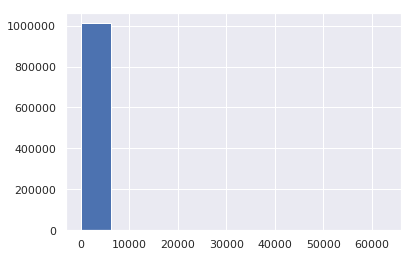

In [68]:
plt.hist(tweets['retweet_count']);

In [69]:
# Proportion of tweets with at least 1 retweet
(len(df) - len(df[df['retweet_count'] == 0])) / len(df)

0.2709403172429533

In [70]:
retweeted = df.loc[df['retweet_count'] > 0]
len(retweeted)

9497

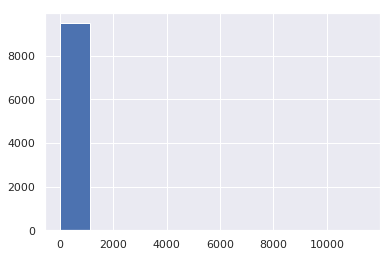

In [71]:
plt.hist(retweeted['retweet_count']);

In [72]:
len(retweeted[retweeted['retweet_count'] <= 20])

8912

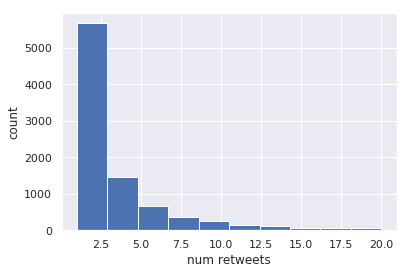

In [73]:
# 
plt.hist(retweeted.loc[retweeted['retweet_count'] <= 20, 'retweet_count'])
plt.xlabel('num retweets')
plt.ylabel('count');

# Favorite counts

In [74]:
tweets['favorite_count'].describe()

count    1.011563e+06
mean     8.555726e+00
std      2.855782e+02
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      1.907820e+05
Name: favorite_count, dtype: float64

# Time Series

In [75]:
def year_fraction(date):
    start = datetime.date(date.year, 1, 1).toordinal()
    year_length = datetime.date(date.year+1, 1, 1).toordinal() - start
    return date.year + float(date.toordinal() - start) / year_length

In [76]:
tweets['year'] = tweets['created_at'].dt.year
tweets['month'] = tweets['created_at'].dt.month
tweets['day'] = tweets['created_at'].dt.day
tweets['hour'] = tweets['created_at'].dt.hour
tweets['weekday'] = tweets['created_at'].dt.weekday

tweets['time_cont'] = tweets['created_at'].apply(year_fraction)

/home/ec2-user/.env/lib64/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


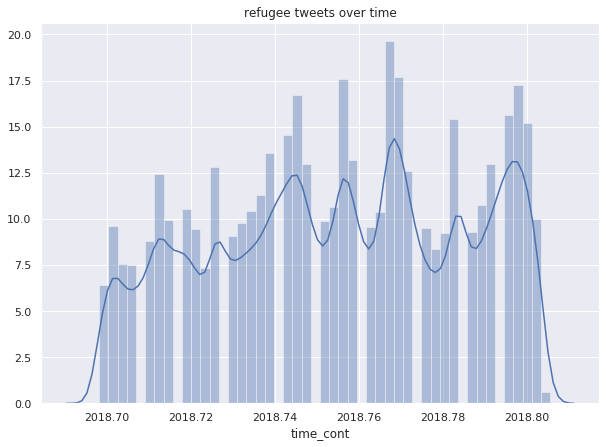

In [77]:
plt.figure(figsize=(10, 7))
sns.distplot(tweets['time_cont'])
plt.ticklabel_format(useOffset=False)
plt.title('refugee tweets over time');